<a href="https://colab.research.google.com/github/champaksworldcreate/colab/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image **Predictor**

**Imports**

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2,decode_predictions , preprocess_input
from keras.applications.nasnet import preprocess_input as nasnetpreprocess,decode_predictions as kerasdecode
#tf.keras.applications.nasnet.preprocess_input
from IPython.core.display import display

**Constants**

In [ ]:
FILE_1='06 Feet.jpg'
FILE_2='12 Horse.jpg'

Pre **processing**

In [ ]:
def predict_by_inception(picname):
  pic = load_img(picname,target_size=(299,299))
  display(pic)
  pic_array = img_to_array(pic)
  expanded=np.expand_dims(pic_array,axis=0)
  preprocessed=preprocess_input(expanded)
  #print(expanded.shape)
  inception_model=InceptionResNetV2(weights='imagenet')
  inception_model.graph=tf.compat.v1.get_default_graph()
  result=inception_model.predict(preprocessed)
  result=decode_predictions(result)
  print(result)
  return result[0][0]

def predict_by_nasnet(picname):
    pic = load_img(picname,target_size=(331,331))
    display(pic)
    pic_array = img_to_array(pic)
    expanded=np.expand_dims(pic_array,axis=0)
    preprocessed=nasnetpreprocess(expanded)
    #print(expanded.shape)
    nasnet_model=tf.keras.applications.NASNetLarge(weights='imagenet')
    nasnet_model.graph=tf.compat.v1.get_default_graph()
    result=nasnet_model.predict(preprocessed)
    result=kerasdecode(result)
    print(result)
    return result[0][0]

**Predictor**

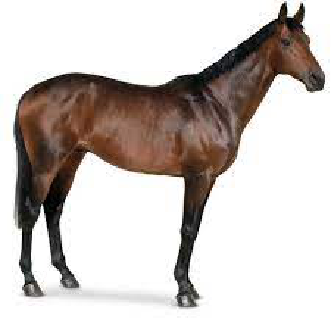

49152/35363 [=========================================] - 0s 0us/step
[[('n02389026', 'sorrel', 0.89314204), ('n03538406', 'horse_cart', 0.0009878437), ('n02422106', 'hartebeest', 0.0008136615), ('n03803284', 'muzzle', 0.000653829), ('n04604644', 'worm_fence', 0.00044033866)]]
sorrel 0.89314204


In [ ]:
id,name,percent = predict_by_nasnet(FILE_2)
print(name,percent)
